<a href="https://colab.research.google.com/github/albs-br/tcc-machine-vision/blob/main/TCC_teste_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
# TCC_teste_1
# v.0.6.0
# Author: André Baptista (andrebaptista.com.br)


In [100]:
#from google.colab import drive
#drive.mount('/content/drive')

In [101]:
import numpy as np
import cv2

#help(cv2.HOGDescriptor())

print("OpenCV version: " + cv2.__version__) # mostar versão do openCV

#from google.colab.patches import cv2_imshow     # aparentemente só funciona dentro do ambiente Colab
from matplotlib import pyplot as plt

%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

from os import listdir
from os.path import isfile, join
import os
import os.path
import sys
import pickle

OpenCV version: 4.5.1


In [102]:
input_dir = "C:/TCC_ForaDoOneDrive/PKLOT - Imagens selecionadas - 43/UFPR04/Sunny/2012-12-07/All/"
#input_dir = "C:/TCC_ForaDoOneDrive/PKLOT - Imagens selecionadas - 3800/UFPR04/016/"

features_dir = "features/"

cluster_dir = "cluster/"

bow_dir = "bow/"

if not os.path.exists(features_dir):
    os.makedirs(features_dir)

if not os.path.exists(cluster_dir):
    os.makedirs(cluster_dir)

if not os.path.exists(bow_dir):
    os.makedirs(bow_dir)

In [103]:
# # limpar diretórios de saída

# # Features (.brief)
# for f in os.listdir(features_dir):
#     if not f.endswith(".brief"):    #if os.path.isdir(f):
#         continue
#     os.remove(os.path.join(features_dir, f))

# # Cluster (cluster.cluster)
# for f in os.listdir(cluster_dir):
#     if not f.endswith(".cluster"):
#         continue
#     os.remove(os.path.join(cluster_dir, f))

# # Bow (.bow)
# for f in os.listdir(bow_dir):
#     if not f.endswith(".bow"):
#         continue
#     os.remove(os.path.join(bow_dir, f))

Mostrar imagem exemplo:


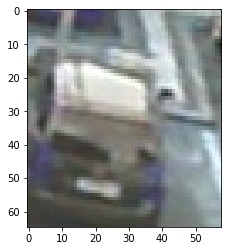

In [104]:
#Mostrar imagem:
#path_teste = input_dir + 'Empty_Cloudy_2012-12-14_16_55_13#016.jpg'
path_teste = input_dir + 'occupied 2012-12-07_17_12_25#016.jpg'
img_teste = cv2.imread(path_teste)

#Show the image with matplotlib
plt.imshow(img_teste)
plt.show()

In [98]:
# # Teste HOG descriptor

# # Create HOG Descriptor object
# # hog = cv2.HOGDescriptor()
# winSize = (64,64)
# blockSize = (16,16)
# blockStride = (8,8)
# cellSize = (8,8)
# nbins = 9
# derivAperture = 1
# winSigma = 4.
# histogramNormType = 0
# L2HysThreshold = 2.0000000000000001e-01
# gammaCorrection = 0
# nlevels = 64
# hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins, derivAperture ,winSigma,
#                         histogramNormType, L2HysThreshold, gammaCorrection, nlevels)

# im = cv2.imread(path_teste, 0) # Grayscale image

# # Compute HOG descriptor
# h = hog.compute(im)

# # winStride = (8,8)
# # padding = (8,8)
# # locations = ((10,20),)
# # h = hog.compute(im, winStride, padding, locations)

# print('Done')
# print(h)

Done
[[0.1427501 ]
 [0.12712009]
 [0.10251274]
 ...
 [0.16031659]
 [0.12867233]
 [0.05697339]]


In [17]:
# # Teste Dense SIFT descriptor

# im = cv2.imread(path_teste, 0) # Grayscale image

# # Create SIFT object
# sift = cv2.xfeatures2d.SIFT_create()

# # Provide a list of keypoints in spaces of 5 pixels horizontally and vertically
# # Change the step size according to what you want
# step_size = 5
# kp = [cv2.KeyPoint(x, y, step_size) for y in range(0, img.shape[0], step_size) 
#                                     for x in range(0, img.shape[1], step_size)]

# # Calculate Dense SIFT feature vector
# dense_feat = sift.compute(img, kp)

# print('Done')
# print(h)

4.0.1


error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\opencv_contrib-4.0.1\modules\xfeatures2d\src\sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


In [105]:
# Initiate ORB detector
# valores default: ORB(int nfeatures=500, float scaleFactor=1.2f, int nlevels=8, int edgeThreshold=31, int firstLevel=0, int WTA_K=2, int scoreType=ORB::HARRIS_SCORE, int patchSize=31)
orb = cv2.ORB_create(
  nfeatures = 500,                    # The maximum number of features to retain.
  scaleFactor = 1.2,                  # Pyramid decimation ratio, greater than 1
  nlevels = 8,                        # The number of pyramid levels.
  edgeThreshold = 15,                 # This is size of the border where the features are not detected. It should roughly match the patchSize parameter
  firstLevel = 0,                     # It should be 0 in the current implementation.
  WTA_K = 2,                          # The number of points that produce each element of the oriented BRIEF descriptor.
  scoreType = cv2.ORB_HARRIS_SCORE,   # The default HARRIS_SCORE means that Harris algorithm is used to rank features (the score is written to KeyPoint::score and is 
                                      # used to retain best nfeatures features); FAST_SCORE is alternative value of the parameter that produces slightly less stable 
                                      # keypoints, but it is a little faster to compute.
  #scoreType = cv2.ORB_FAST_SCORE,
  patchSize = 15                      # size of the patch used by the oriented BRIEF descriptor. Of course, on smaller pyramid layers the perceived image area covered
                                      # by a feature will be larger.
)

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

imagem: 2012-12-07_17_17_25#016.jpg


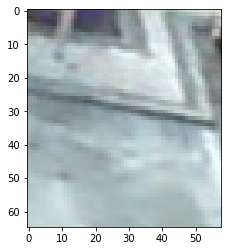

número de features (keypoints) encontradas: 5
formato (keypoints, dimensões): (5, 32)


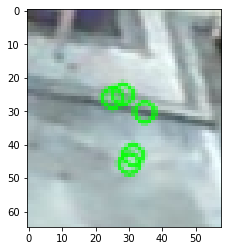

----------------------------------------
imagem: 2012-12-07_17_22_25#016.jpg


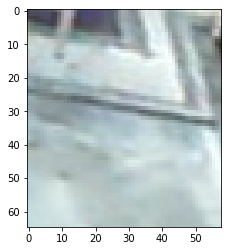

número de features (keypoints) encontradas: 7
formato (keypoints, dimensões): (7, 32)


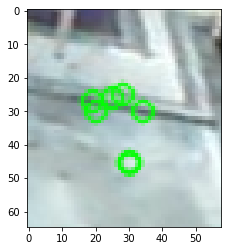

----------------------------------------
imagem: 2012-12-07_17_27_25#016.jpg


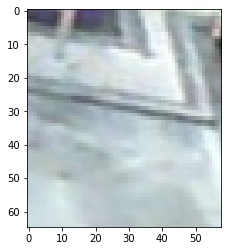

número de features (keypoints) encontradas: 4
formato (keypoints, dimensões): (4, 32)


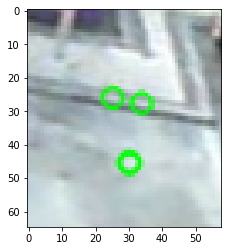

----------------------------------------
imagem: 2012-12-07_17_32_25#016.jpg


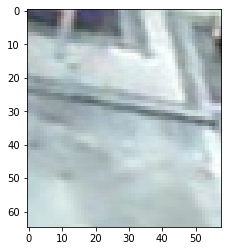

número de features (keypoints) encontradas: 2
formato (keypoints, dimensões): (2, 32)


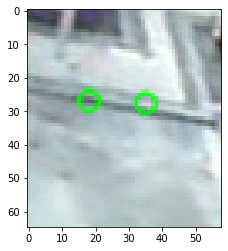

----------------------------------------
imagem: 2012-12-07_17_37_25#016.jpg


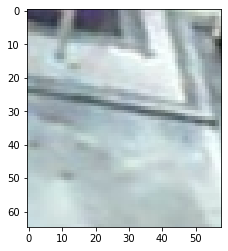

número de features (keypoints) encontradas: 8
formato (keypoints, dimensões): (8, 32)


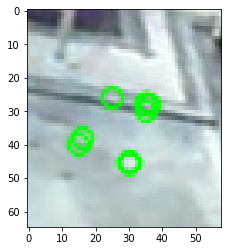

----------------------------------------
imagem: 2012-12-07_17_42_25#016.jpg


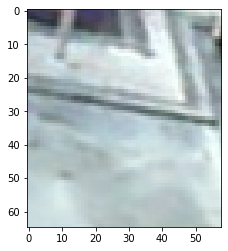

número de features (keypoints) encontradas: 7
formato (keypoints, dimensões): (7, 32)


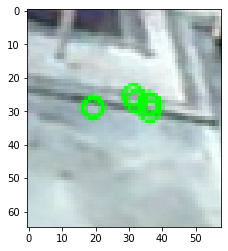

----------------------------------------
imagem: 2012-12-07_17_47_26#016.jpg


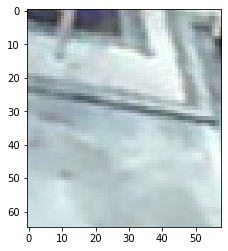

número de features (keypoints) encontradas: 8
formato (keypoints, dimensões): (8, 32)


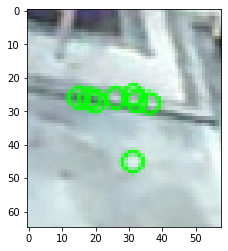

----------------------------------------
imagem: 2012-12-07_17_52_26#016.jpg


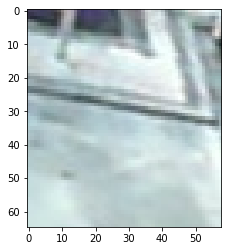

número de features (keypoints) encontradas: 11
formato (keypoints, dimensões): (11, 32)


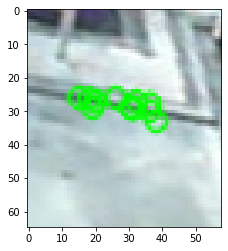

----------------------------------------
imagem: 2012-12-07_17_57_26#016.jpg


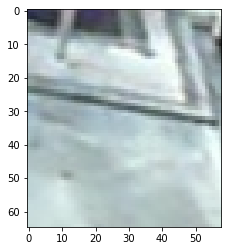

número de features (keypoints) encontradas: 8
formato (keypoints, dimensões): (8, 32)


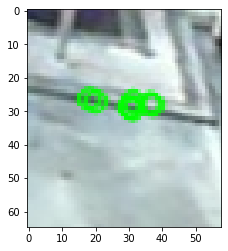

----------------------------------------
imagem: 2012-12-07_18_02_26#016.jpg


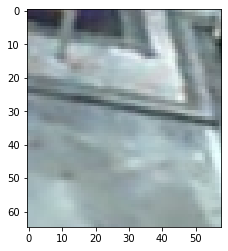

número de features (keypoints) encontradas: 6
formato (keypoints, dimensões): (6, 32)


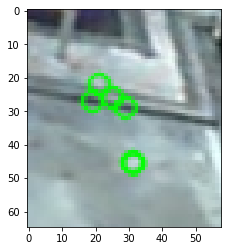

----------------------------------------
imagem: 2012-12-07_18_07_26#016.jpg


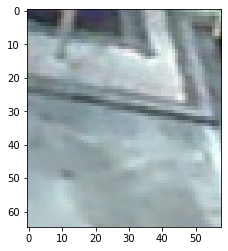

número de features (keypoints) encontradas: 8
formato (keypoints, dimensões): (8, 32)


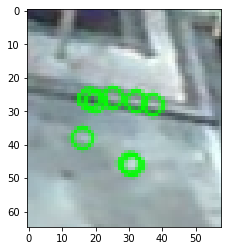

----------------------------------------
imagem: 2012-12-07_18_12_26#016.jpg


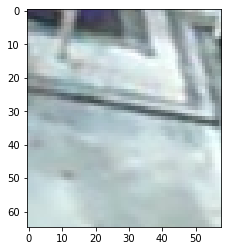

número de features (keypoints) encontradas: 12
formato (keypoints, dimensões): (12, 32)


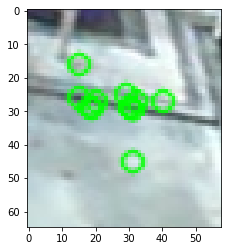

----------------------------------------
imagem: 2012-12-07_18_27_26#016.jpg


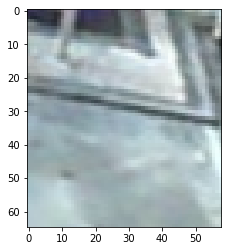

número de features (keypoints) encontradas: 10
formato (keypoints, dimensões): (10, 32)


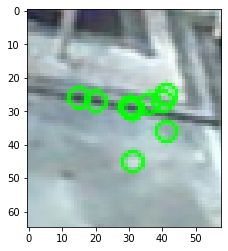

----------------------------------------
imagem: 2012-12-07_18_32_26#016.jpg


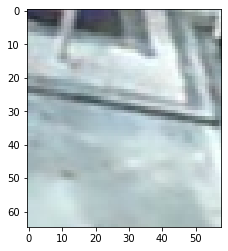

número de features (keypoints) encontradas: 11
formato (keypoints, dimensões): (11, 32)


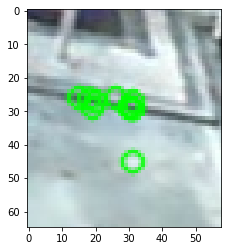

----------------------------------------
imagem: 2012-12-07_18_37_26#016.jpg


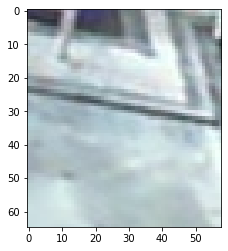

número de features (keypoints) encontradas: 10
formato (keypoints, dimensões): (10, 32)


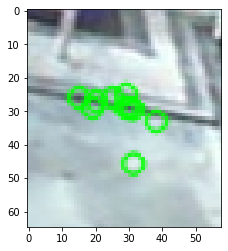

----------------------------------------
imagem: 2012-12-07_18_42_26#016.jpg


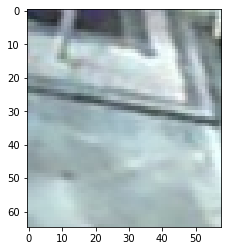

número de features (keypoints) encontradas: 14
formato (keypoints, dimensões): (14, 32)


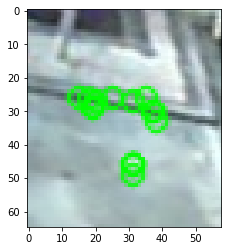

----------------------------------------
imagem: 2012-12-07_18_47_27#016.jpg


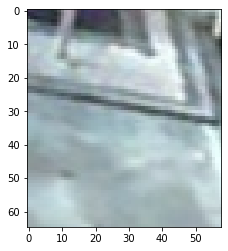

número de features (keypoints) encontradas: 8
formato (keypoints, dimensões): (8, 32)


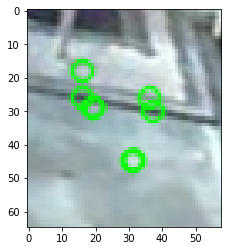

----------------------------------------
imagem: 2012-12-07_18_52_27#016.jpg


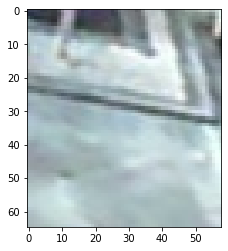

número de features (keypoints) encontradas: 9
formato (keypoints, dimensões): (9, 32)


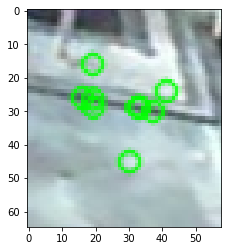

----------------------------------------
imagem: 2012-12-07_18_57_27#016.jpg


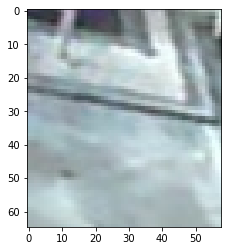

número de features (keypoints) encontradas: 5
formato (keypoints, dimensões): (5, 32)


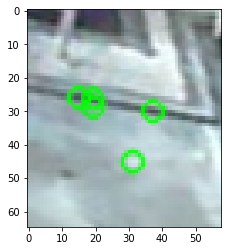

----------------------------------------
imagem: 2012-12-07_19_17_27#016.jpg


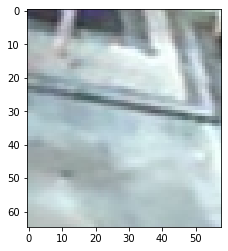

número de features (keypoints) encontradas: 6
formato (keypoints, dimensões): (6, 32)


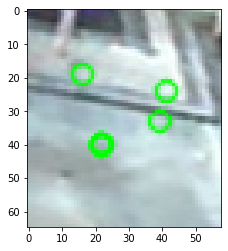

----------------------------------------
imagem: 2012-12-07_19_22_27#016.jpg


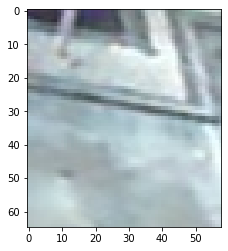

número de features (keypoints) encontradas: 9
formato (keypoints, dimensões): (9, 32)


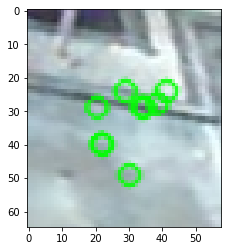

----------------------------------------
imagem: 2012-12-07_19_27_27#016.jpg


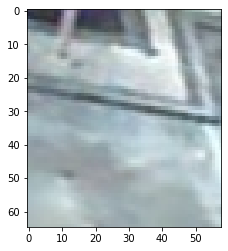

número de features (keypoints) encontradas: 8
formato (keypoints, dimensões): (8, 32)


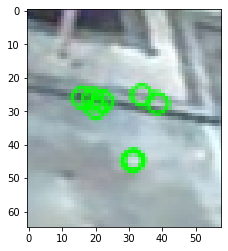

----------------------------------------
imagem: 2012-12-07_19_32_27#016.jpg


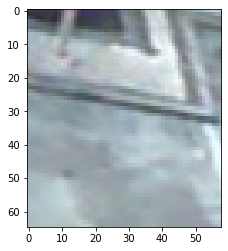

número de features (keypoints) encontradas: 3
formato (keypoints, dimensões): (3, 32)


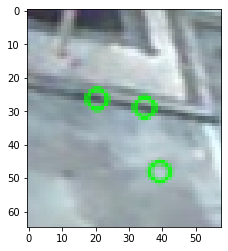

----------------------------------------
imagem: 2012-12-07_19_37_28#016.jpg


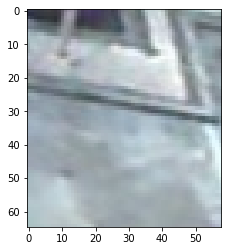

número de features (keypoints) encontradas: 4
formato (keypoints, dimensões): (4, 32)


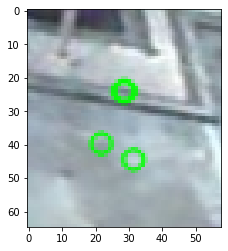

----------------------------------------
imagem: 2012-12-07_19_42_28#016.jpg


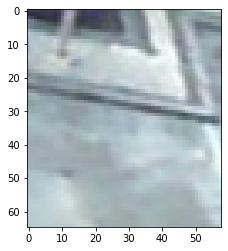

número de features (keypoints) encontradas: 8
formato (keypoints, dimensões): (8, 32)


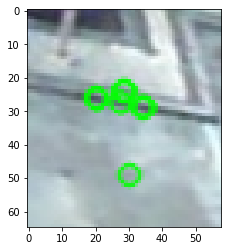

----------------------------------------
imagem: 2012-12-07_19_47_28#016.jpg


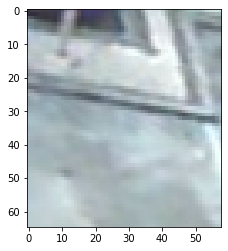

número de features (keypoints) encontradas: 9
formato (keypoints, dimensões): (9, 32)


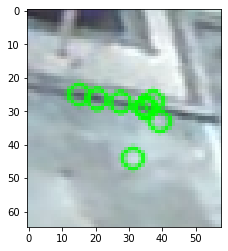

----------------------------------------
imagem: 2012-12-07_19_52_28#016.jpg


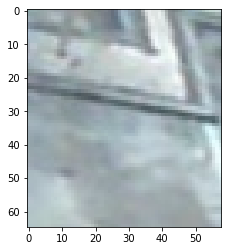

número de features (keypoints) encontradas: 4
formato (keypoints, dimensões): (4, 32)


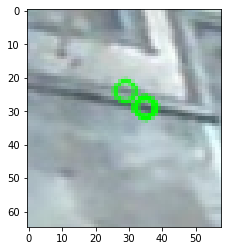

----------------------------------------
imagem: 2012-12-07_19_57_28#016.jpg


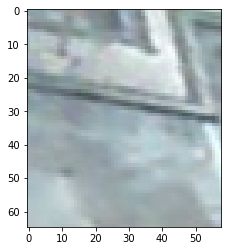

número de features (keypoints) encontradas: 8
formato (keypoints, dimensões): (8, 32)


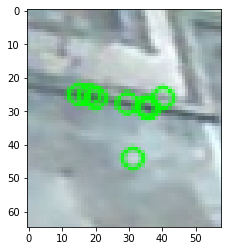

----------------------------------------
imagem: 2012-12-07_20_02_28#016.jpg


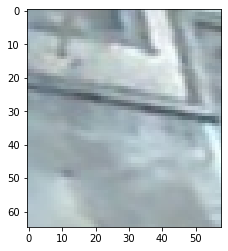

número de features (keypoints) encontradas: 10
formato (keypoints, dimensões): (10, 32)


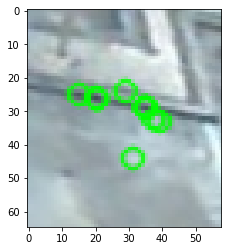

----------------------------------------
imagem: 2012-12-07_20_07_28#016.jpg


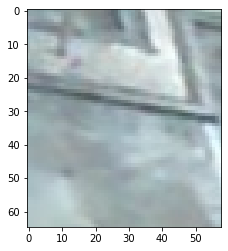

número de features (keypoints) encontradas: 7
formato (keypoints, dimensões): (7, 32)


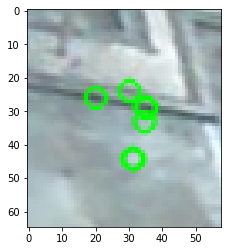

----------------------------------------
imagem: 2012-12-07_20_12_28#016.jpg


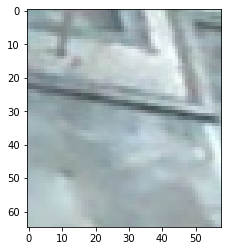

número de features (keypoints) encontradas: 6
formato (keypoints, dimensões): (6, 32)


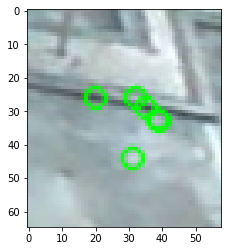

----------------------------------------
imagem: 2012-12-07_20_17_28#016.jpg


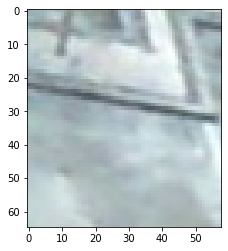

número de features (keypoints) encontradas: 3
formato (keypoints, dimensões): (3, 32)


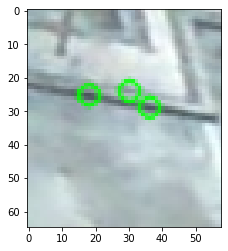

----------------------------------------
imagem: 2012-12-07_20_22_28#016.jpg


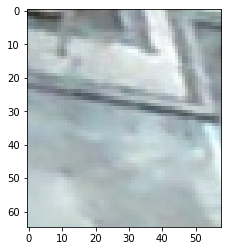

número de features (keypoints) encontradas: 9
formato (keypoints, dimensões): (9, 32)


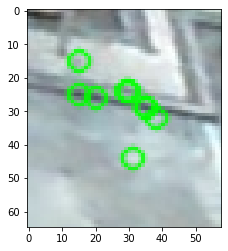

----------------------------------------
imagem: 2012-12-07_20_27_28#016.jpg


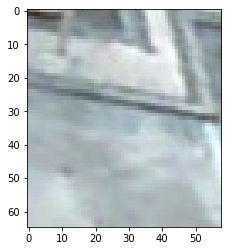

número de features (keypoints) encontradas: 6
formato (keypoints, dimensões): (6, 32)


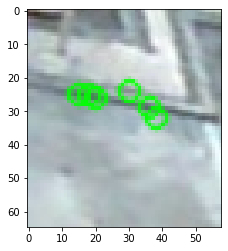

----------------------------------------
imagem: 2012-12-07_20_32_28#016.jpg


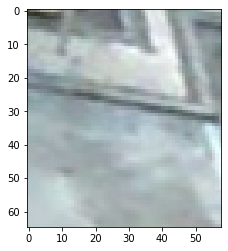

número de features (keypoints) encontradas: 4
formato (keypoints, dimensões): (4, 32)


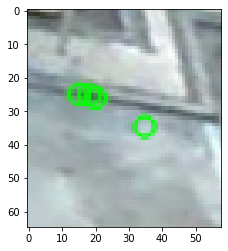

----------------------------------------
imagem: 2012-12-07_20_37_29#016.jpg


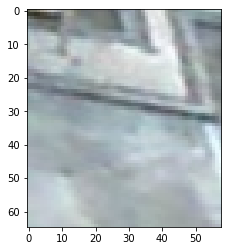

número de features (keypoints) encontradas: 8
formato (keypoints, dimensões): (8, 32)


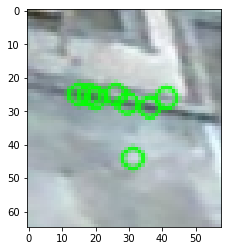

----------------------------------------
imagem: 2012-12-07_20_42_29#016.jpg


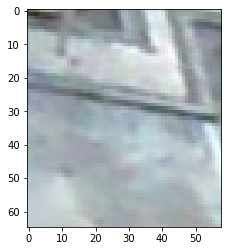

número de features (keypoints) encontradas: 8
formato (keypoints, dimensões): (8, 32)


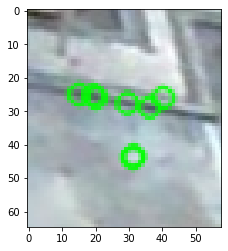

----------------------------------------
imagem: occupied 2012-12-07_17_12_25#016.jpg


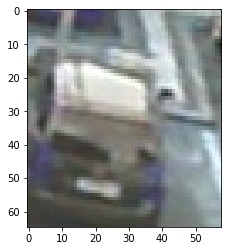

número de features (keypoints) encontradas: 32
formato (keypoints, dimensões): (32, 32)


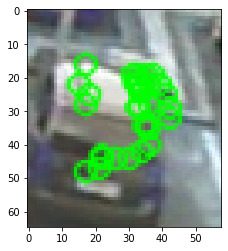

----------------------------------------
imagem: occupied 2012-12-07_18_17_26#016.jpg


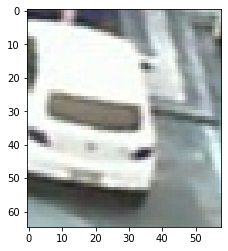

número de features (keypoints) encontradas: 27
formato (keypoints, dimensões): (27, 32)


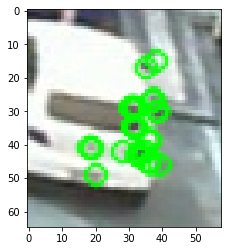

----------------------------------------
imagem: occupied 2012-12-07_18_22_26#016.jpg


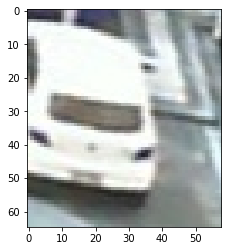

número de features (keypoints) encontradas: 22
formato (keypoints, dimensões): (22, 32)


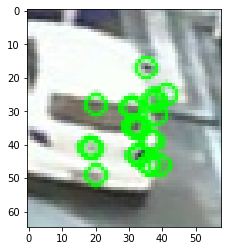

----------------------------------------
imagem: occupied 2012-12-07_19_02_27#016.jpg


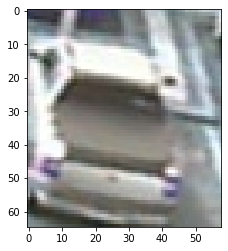

número de features (keypoints) encontradas: 15
formato (keypoints, dimensões): (15, 32)


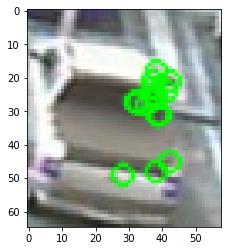

----------------------------------------
imagem: occupied 2012-12-07_19_07_27#016.jpg


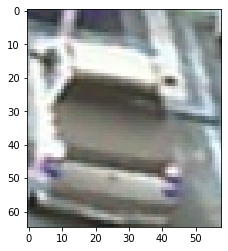

número de features (keypoints) encontradas: 19
formato (keypoints, dimensões): (19, 32)


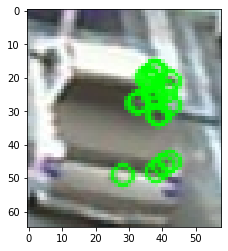

----------------------------------------
imagem: occupied 2012-12-07_19_12_27#016.jpg


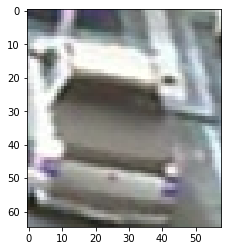

número de features (keypoints) encontradas: 15
formato (keypoints, dimensões): (15, 32)


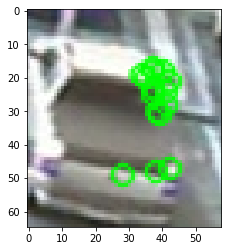

----------------------------------------
Wall time: 10.9 s


In [106]:
%%time

#print(os.path.exists(input_dir))

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(input_dir):
    onlyfiles = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        print("imagem: " + file)
    
        img_path = join(input_dir, file)

        img = cv2.imread(img_path)

        # mostrar imagem original
        plt.imshow(img)
        plt.show()

        # opcional: redimensiona a imagem
        #img = cv2.resize(
        # img, (160, 160), interpolation=cv2.INTER_CUBIC)
        
        
        
        # Initiate STAR detector
        #star = cv2.xfeatures2d.StarDetector_create()

#         # Initiate ORB detector
#         # valores default: ORB(int nfeatures=500, float scaleFactor=1.2f, int nlevels=8, int edgeThreshold=31, int firstLevel=0, int WTA_K=2, int scoreType=ORB::HARRIS_SCORE, int patchSize=31)
#         orb = cv2.ORB_create(
#           nfeatures = 500,                    # The maximum number of features to retain.
#           scaleFactor = 1.2,                  # Pyramid decimation ratio, greater than 1
#           nlevels = 8,                        # The number of pyramid levels.
#           edgeThreshold = 7,                  # This is size of the border where the features are not detected. It should roughly match the patchSize parameter
#           firstLevel = 0,                     # It should be 0 in the current implementation.
#           WTA_K = 2,                          # The number of points that produce each element of the oriented BRIEF descriptor.
#           scoreType = cv2.ORB_HARRIS_SCORE,   # The default HARRIS_SCORE means that Harris algorithm is used to rank features (the score is written to KeyPoint::score and is 
#                                               # used to retain best nfeatures features); FAST_SCORE is alternative value of the parameter that produces slightly less stable 
#                                               # keypoints, but it is a little faster to compute.
#           #scoreType = cv2.ORB_FAST_SCORE,
#           patchSize = 7                       # size of the patch used by the oriented BRIEF descriptor. Of course, on smaller pyramid layers the perceived image area covered
#                                               # by a feature will be larger.
#         )



#         # Initiate BRIEF extractor
#         brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
        

        # find the keypoints with STAR
        #kp = star.detect(img, None)

        # find the keypoints with ORB
        kp = orb.detect(img, None)



        # compute the descriptors with BRIEF
        #kp, feat = brief.compute(img, kp)        

        # compute the descriptors with ORB
        kp, feat = orb.compute(img, kp)


        # imprimir numero de features encontradas
        print("número de features (keypoints) encontradas: " + str(len(kp)))
        print("formato (keypoints, dimensões): " + str(np.shape(feat)))
        #print(feat)

        # mostrar imagem com os keypoints encontrados
        img2_kp = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=cv2.DrawMatchesFlags_DEFAULT)
        plt.figure()
        plt.imshow(img2_kp)
        plt.show()



        feat_path = join(features_dir, file)

        # store the data as binary data stream
        if len(kp) > 0:
            with open(feat_path + ".brief", "wb") as f:
                pickle.dump(feat.tolist(), f)
        else:
            print("Erro: 0 features encontradas")

        # f = open(feat_path + ".brief.txt", "w")
        # f.write(str(feat.tolist()))
        # f.close()

        print("----------------------------------------")

Criação do vocabulário visual

1. Clusterização

In [107]:
from sklearn.cluster import KMeans
import time

In [108]:
cluster_file = cluster_dir + "cluster.cluster"

In [112]:
# número de clusters
#k = 64
# k = 1024
k = 256

# números de dimensões das features
dim = 32

In [113]:
# salva o vocabulário criado (centroids) em disco
def saveCentroids (kmeans, output_file, dim):
    i = 0
    desc = ""

    for k in np.nditer(kmeans.cluster_centers_):        
        a = np.array(k).round(2)
        desc += str(a) + " "
        i += 1        

        if (i % dim) == 0:
            desc += "\n" 

    output_file.write(desc)

In [114]:
%%time
listOfFeat = []

print(os.path.exists(features_dir))

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
        #print(file)
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)

        #print(feat)

        for item in feat:
            listOfFeat.append(item)

output_file = open(cluster_file, 'w')

# print( np.asarray(listOfFeat) )
print( np.asarray(listOfFeat).shape )
# output_file.write(np.asarray(listOfFeat[0]))
    
t1 = time.time()  
kmeans = KMeans(n_clusters=k, random_state=0).fit(np.asarray(listOfFeat))
t2 = time.time()
tf = t2 - t1

print(tf)

saveCentroids (kmeans, output_file, dim)  
output_file.close()

print('Terminado salvar .cluster')

True
(403, 32)
1.3014256954193115
Terminado salvar .cluster
Wall time: 1.38 s


2. Bag of Visual Word

In [116]:
%%time

print('start')

# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]

    bowOfImages = []    
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)        

        # inicializa o BoW da imagem com zero para cada dimensão
        bow = [0] * clusters

        # procedimento força bruta para cálculo de distância (euclidean distance)
        for item in feat:
            result = sys.float_info.max
            centroid_id = 0

            for id, c in enumerate(centroids):
                # Euclidean Distance 
                dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
                if dist < result:
                    result = dist
                    centroid_id = id

            bow[centroid_id] += 1                     
        
        bow_path = join(bow_dir, file)

        with open(bow_path + ".bow", 'w') as f:
            for item in bow:
                f.write("%s " % item)

print("Terminado salvar arquivos de features (.brief)")

start
Terminado salvar arquivos de features (.brief)
Wall time: 1.81 s


**Busca**

Utilizando um arquivo de BoW de uma das imagens de entrada

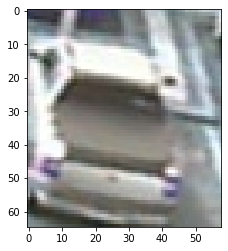

2012-12-07_17_17_25#016.jpg.brief.bow: 4.47213595499958
2012-12-07_17_22_25#016.jpg.brief.bow: 4.69041575982343
2012-12-07_17_27_25#016.jpg.brief.bow: 4.358898943540674
2012-12-07_17_32_25#016.jpg.brief.bow: 4.123105625617661
2012-12-07_17_37_25#016.jpg.brief.bow: 4.795831523312719
2012-12-07_17_42_25#016.jpg.brief.bow: 4.69041575982343
2012-12-07_17_47_26#016.jpg.brief.bow: 4.795831523312719
2012-12-07_17_52_26#016.jpg.brief.bow: 5.291502622129181
2012-12-07_17_57_26#016.jpg.brief.bow: 4.795831523312719
2012-12-07_18_02_26#016.jpg.brief.bow: 4.58257569495584
2012-12-07_18_07_26#016.jpg.brief.bow: 5.0
2012-12-07_18_12_26#016.jpg.brief.bow: 5.196152422706632
2012-12-07_18_27_26#016.jpg.brief.bow: 5.0
2012-12-07_18_32_26#016.jpg.brief.bow: 5.0990195135927845
2012-12-07_18_37_26#016.jpg.brief.bow: 5.0
2012-12-07_18_42_26#016.jpg.brief.bow: 5.385164807134504
2012-12-07_18_47_27#016.jpg.brief.bow: 4.795831523312719
2012-12-07_18_52_27#016.jpg.brief.bow: 4.898979485566356
2012-12-07_18_57_27

In [119]:
%%time
# leitura das imagens do diretório

#img_busca = "2012-12-07_19_27_27#016.jpg"
img_busca = "occupied 2012-12-07_19_02_27#016.jpg"
# mostrar imagem buscada
img = cv2.imread(input_dir + img_busca)
plt.imshow(img)
plt.show()

# print(input_dir + img_busca)

q = np.loadtxt(bow_dir + img_busca + ".brief.bow")

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

**Utilizando uma nova imagem qualquer**

Calculando features locais da imagem de consulta

In [120]:
path_busca = "C:/TCC_ForaDoOneDrive/PKLOT - Imagens selecionadas - 3800/UFPR04/016_Search/"
q = path_busca + "Occupied_Sunny_2012-12-21_15_30_11#016.jpg"
q_feature = q + ".brief"
q_bow = q_feature + ".bow"

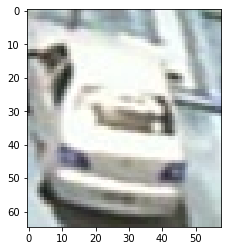

38
(38, 32)


In [121]:
img_search = cv2.imread(q)

#Show the image with matplotlib
plt.imshow(img_search)
plt.show()

# Initiate STAR detector
#star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
#brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
#kp = star.detect(img_search,None)

# find the keypoints with ORB
kp = orb.detect(img_search, None)

# compute the descriptors with BRIEF
#kp, feat = brief.compute(img_search, kp)        

# compute the descriptors with ORB
kp, feat = orb.compute(img_search, kp)

print(len(kp))
print(np.shape(feat))
# print(feat)

# store the data as binary data stream
with open(q_feature, "wb") as f:
    pickle.dump(feat.tolist(), f)        

Calculando BoW da imagem de consulta (observe que o mesmo vocabulário visual calculado anteriormente é utilizado)

In [122]:
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

with open(q_feature, 'rb') as f:
    # read the data as binary data stream
    feat = pickle.load(f)        

    # inicializa o BoW da imagem com zero para cada dimensão
    bow = [0] * clusters

    # procedimento força bruta para cálculo de distância (euclidean distance)
    for item in feat:
        result = sys.float_info.max
        centroid_id = 0

        for id, c in enumerate(centroids):
            dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
            if dist < result:
              result = dist
              centroid_id = id

        bow[centroid_id] += 1                     

    with open(q_bow, 'w') as f:
        for item in bow:
            f.write("%s " % item)

print("Done")

Done


Realizando a consulta

In [96]:
# leitura das imagens do diretório

q = np.loadtxt(q_bow)

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

2012-12-07_17_17_25#016.jpg.brief.bow: 14.966629547095765
2012-12-07_17_22_25#016.jpg.brief.bow: 14.832396974191326
2012-12-07_17_27_25#016.jpg.brief.bow: 14.52583904633395
2012-12-07_17_32_25#016.jpg.brief.bow: 14.696938456699069
2012-12-07_17_37_25#016.jpg.brief.bow: 15.588457268119896
2012-12-07_17_42_25#016.jpg.brief.bow: 15.264337522473747
2012-12-07_17_47_26#016.jpg.brief.bow: 14.866068747318506
2012-12-07_17_52_26#016.jpg.brief.bow: 15.652475842498529
2012-12-07_17_57_26#016.jpg.brief.bow: 15.165750888103101
2012-12-07_18_02_26#016.jpg.brief.bow: 15.874507866387544
2012-12-07_18_07_26#016.jpg.brief.bow: 15.524174696260024
2012-12-07_18_12_26#016.jpg.brief.bow: 15.652475842498529
2012-12-07_18_27_26#016.jpg.brief.bow: 16.217274740226856
2012-12-07_18_32_26#016.jpg.brief.bow: 15.394804318340652
2012-12-07_18_37_26#016.jpg.brief.bow: 15.748015748023622
2012-12-07_18_42_26#016.jpg.brief.bow: 15.748015748023622
2012-12-07_18_47_27#016.jpg.brief.bow: 15.84297951775486
2012-12-07_18_52